In [30]:
import pandas as pd
import numpy as np
idmode = "partyid"
scaleddf=pd.read_csv('Data_party_qs_removed_enumScale(for q2).csv')
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Other"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "No - none"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Don't know"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Scottish National Party (SNP)"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Plaid Cymru"],inplace=True)
scaleddfnoid = scaleddf.drop(idmode,axis = 1)

label = scaleddf[idmode]
vals = scaleddfnoid.values
print(type(scaleddf))

kmeansdata = scaleddf.drop([idmode],axis =1)
kmeansmatrix = kmeansdata.to_numpy()
scaleddf = scaleddf.reset_index(drop=True)
print(np.unique(label))


<class 'pandas.core.frame.DataFrame'>
['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']


In [3]:
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from purity_check import purity_check

voteorpref = idmode

def f1_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = data.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number



def kmeans_distance(cluster,data_compare,n_clusters):
    data = scaleddf
    cost_matrix = np.zeros([data_compare.shape[0],n_clusters])
    for i in range(data_compare.shape[0]):
        point_costs = []
        for c in range(n_clusters):
            diss = np.linalg.norm(data_compare[i,:]-cluster[c,:])
            cost_matrix[i,c]=diss
    return cost_matrix


def optimal_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    #scaleddf = scaleddf.reset_index(drop=True)
    data = scaleddf
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = scaleddf.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        name_count = 0 
        for x in range(len(optimal_cluster_assignments_names)):
                if name in optimal_cluster_assignments_names[x]:
                    name_count += 1
        if name_count != 0:
            name = name + str(name_count+1)
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number


"""
def kmpurity2(input,curmethod):
    
    purity_values = [] 
    cluster_numbers = []
    clusters = range(6,10)
    for i in clusters:
        #print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i, random_state=0)
        kmeans.fit_predict(input)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,input,i)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        #print(optimal_assignments)
        clusterpops = optimal_assignments[0]
        optimal_assignments = optimal_cluster_assignments_lists(optimal_assignments)
        #print(optimal_assignments)
        wrongcounts = list(np.zeros(i+1))
        optimaldict = dict()
        optimaldict2 = dict()
        for i in range(len(optimal_assignments[0])):
            #print(optimal_assignments[1][i])
            optimaldict[optimal_assignments[1][i]]=optimal_assignments[0][i]
            optimaldict2[optimal_assignments[0][i]]=optimal_assignments[1][i]
        #print(optimaldict)
        for i in range(len(optimal_assignments[1])):#for each cluster
            #optimal_assignments[0][i] is ith name
            # optimal_assignments[1][i] is ith cluster num in kmlabels 
            for k in range(len(kmeans.labels_)):#for each value
                #k is original data index
                if optimal_assignments[1][i] != kmeans.labels_[k]:#kth point not assigned to current cluster
                    #if point k not assigned to cluster
                    #dont need to check  its
                    continue
                #by this point kth point is definetly assigned to ith cluster
                if scaleddf[idmode][k] not in optimal_assignments[0][i]:
                    
                    #if correct label not in name from optimal assinments
                    #optimaldict[kmeans.labels_[k]]  maps the label to name 
                    #print(optimaldict2[kmeans.labels_[k]])
                    wrongcounts[optimal_assignments[1][i]]+=1
        
        
        clusterpops = list(np.zeros(len(np.unique(kmeans.labels_))))
        

        for i in kmeans.labels_:
            clusterpops[i]+=1
        #print(clusterpops)
        #print(optimal_assignments[0])
        impurities = np.zeros(len(clusterpops))
        for j in range(len(clusterpops)):
            impurities[j]=(clusterpops[j]-wrongcounts[j])/clusterpops[j]
            
        #mean_purity = purity_check(optimal_assignments[0],scaleddf,i,vote_or_pref=idmode)
        #print("impurity stuff \n")
        #print(impurities)
        #print(wrongcounts)
        #print(clusterpops)
        mean_purity =np.mean(impurities)
        for i in impurities:
            if i > 1:
                print("reeeeeee\n\n\nreeeeeeeee")
                print(impurities)
                
                print(clusterpops)
                print(wrongcounts)
                print(mean_purity)
                print(np.sum(clusterpops))
                print((np.sum(wrongcounts)/np.sum(clusterpops)))
        
        #print(impurities)
                
        
        print(mean_purity)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(clusters,purity_values)

"""
#normal k means
"""def kmpurity(input,curmethod):
    purity_values = [] 
    cluster_numbers = []
    for i in range(6,18):
        print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i+1)
        kmeans.fit_predict(input)
        mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(purity_values)
    """






def kmpurity(embedding,curmethod):
    clusters = range(6,18)
    data = scaleddf
    labels = scaleddf[idmode]
    f1values=[]
    purity_values=[]
    for n_clusters in clusters:
        kmeans = KMeans(n_clusters, random_state=0)
        kmeans.fit_predict(embedding)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,embedding,n_clusters)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        cluster_assignments_names, cluster_assignments_number = f1_cluster_assignments_lists(optimal_assignments)
        cluster_assignments = pd.DataFrame({'Party Vote':data[idmode]})
        cluster_assignments['FirstAssignment'] = kmeans.labels_
        for x in range(len(cluster_assignments_number)):
            cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].replace(int(cluster_assignments_number[x]),cluster_assignments_names[x])
        cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].astype('category')
        #cluster_assignments['FirstAssignment'] = cluster_assignments['FirstAssignment'].cat.remove_unused_categories()
        #cluster_assignments['Party Vote'] = cluster_assignments['Party Vote'].cat.remove_unused_categories()
        #sum_of_squared_distances.append(kmeans.inertia_)
        y_true = np.transpose(np.array(cluster_assignments['Party Vote']))
        y_pred = np.transpose(np.array(cluster_assignments['FirstAssignment']))
        f1 = f1_score(y_pred,y_true,average='micro')
        f1values.append(f1)
        mean_purity = purity_check(kmeans.labels_,scaleddf,n_clusters,vote_or_pref=idmode)
        purity_values.append(mean_purity)
        print(mean_purity)
    print(curmethod)
    purities[curmethod]=purity_values.copy()
    f1s[curmethod]=f1values.copy()
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].plot(clusters, purity_values)
    ax[0].set_title('Purity')
    print(f1values)
    print(np.shape(f1values))
    ax[1].plot(clusters,f1values)
    ax[1].set_title("f1 Scores")
    

#f1s=dict()
#purities = dict()

In [4]:
scaleddf = scaleddf.reset_index(drop=True)
data = scaleddf
purities = dict()
f1s=dict()

In [24]:
print(np.unique(scaleddf[idmode]))

['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']


['Brexit Party' 'Conservative' 'Green Party' 'Labour'
 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']
Labour
3
Labour
3
Labour
3
Liberal Democrat
4
Labour
3
Conservative
1
Labour
3
Labour
3
Labour
3
Labour
3
Brexit Party
0
Liberal Democrat
4
Labour
3
Labour
3
Conservative
1
Conservative
1
Conservative
1
Labour
3
Conservative
1
Conservative
1
Conservative
1
Conservative
1
Green Party
2
Conservative
1
Conservative
1
Conservative
1
Liberal Democrat
4
Conservative
1
Labour
3
Labour
3
Labour
3
Conservative
1
Labour
3
Labour
3
Conservative
1
Green Party
2
Labour
3
Labour
3
Conservative
1
Green Party
2
Labour
3
Liberal Democrat
4
Labour
3
Liberal Democrat
4
Green Party
2
Brexit Party
0
Liberal Democrat
4
Conservative
1
Conservative
1
Labour
3
Conservative
1
Conservative
1
Liberal Democrat
4
Conservative
1
Conservative
1
Liberal Democrat
4
Green Party
2
Labour
3
Labour
3
Labour
3


<BarContainer object of 6 artists>

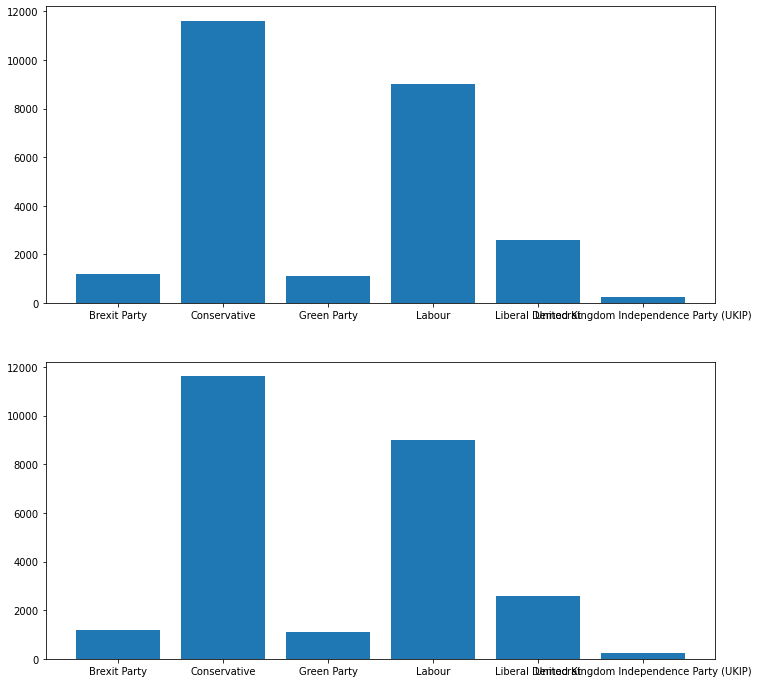

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
knndata = scaleddf.copy()
knndata.drop(knndata.index[knndata[idmode] == "Liberal Democrat"],inplace=True)
print(np.unique(knndata[idmode]))
neigh1 = neigh.fit(knndata.drop(idmode,axis=1),knndata[idmode])
neigh2 = neigh.fit(knndata.drop(idmode,axis=1),knndata[idmode])
original = neigh.predict(knndata.drop(idmode,axis=1))
counts = np.zeros(len(np.unique(scaleddf[idmode])))
counts2 = counts
uniques = np.unique(scaleddf[idmode])
uniques2 = np.unique(knndata[idmode])
dictionary = dict(zip(uniques, range(len(uniques))))
print(uniques)

for i in scaleddf[idmode]:
    print(i)
    i = dictionary[i]
    print(i)
    counts[i]+=1

fig, ax = plt.subplots(2)
#print(scaleddf.loc[scaleddf[idmode] == "Liberal Democrat"])
for i in scaleddf.loc[scaleddf[idmode] == "Liberal Democrat"][idmode]:
    
    print(i)
prediction = neigh.predict(scaleddf.loc[scaleddf[idmode] == "Liberal Democrat"].drop(idmode,axis=1))

for i in prediction:
    i = dictionary[i]
    counts2[i]+=1
print(np.shape(uniques))
print(np.shape(counts))
print(np.shape(counts2))
print(np.shape(uniques2))
fig.set_size_inches(12,12)
ax[0].bar(uniques,counts2)
ax[1].bar(uniques,counts)

In [ ]:
print(type(purities))
print(np.shape(purities))
print(purities)
for i in purities.keys():
    plt.plot(range(6,18),purities[i],label = i)
    
    plt.legend()
plt.xlabel("Number of Clusters")
plt.ylabel("Purity of Clusters")

plt.title("Comparison of Kmeans Purities with Dim Reduction")

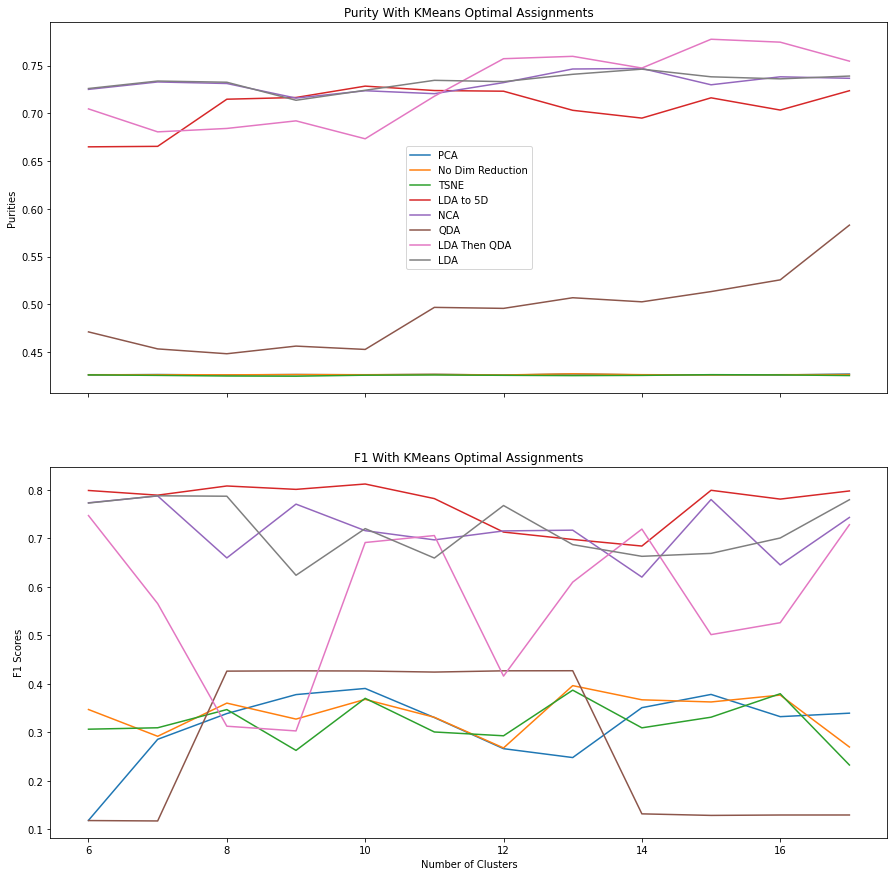

In [16]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(15,15)
clusters = range(6,18)
for i in purities.keys():
    ax[0].plot(clusters,purities[i],label = i)
    ax[0].set_title("Purity With KMeans Optimal Assignments")
    ax[0].legend()
    ax[0].set_ylabel("Purities")
    ax[1].plot(clusters,f1s[i],label = i)
    ax[1].set_title("F1 With KMeans Optimal Assignments")
    
    ax[1].set_xlabel("Number of Clusters")
    ax[1].set_ylabel("F1 Scores")

In [17]:
print(pd.DataFrame.from_dict(purities, orient='index'))
purititydf = pd.DataFrame.from_dict(purities, orient='index')
f1df =pd.DataFrame.from_dict(f1s, orient='index')
purititydf.to_csv("purity_km_optimal")
f1df.to_csv("F1_km_optimal")


                        0         1         2         3         4         5   \
PCA               0.426060  0.426524  0.426076  0.426527  0.426203  0.426720   
No Dim Reduction  0.426322  0.426329  0.426216  0.426500  0.426334  0.426653   
TSNE              0.426173  0.425636  0.424986  0.424790  0.425835  0.426099   
LDA to 5D         0.664967  0.665475  0.714840  0.716634  0.728534  0.723925   
NCA               0.725134  0.732903  0.731285  0.715995  0.723708  0.720625   
QDA               0.471173  0.453361  0.448300  0.456300  0.452815  0.496848   
LDA Then QDA      0.704696  0.680647  0.684225  0.692166  0.673394  0.717941   
LDA               0.726043  0.733868  0.732610  0.713734  0.724209  0.734612   

                        6         7         8         9         10        11  
PCA               0.425907  0.427116  0.426142  0.426213  0.426057  0.427039  
No Dim Reduction  0.426076  0.427269  0.426371  0.426096  0.426337  0.426483  
TSNE              0.425713  0.425388  0.42

0.42606024911545787
0.4265239614744295
0.4260762389396965
0.42652658374293634
0.42620348881544334
0.42671960543930854
0.4259069799615928
0.42711632303789987
0.42614203793378824
0.42621335751536293
0.42605699482737003
0.42703914478306215
PCA
[0.11867040794301749, 0.2857759551046838, 0.3389164688107058, 0.37802719620116554, 0.3906755881718109, 0.33067127131448304, 0.26647960284912586, 0.2481761277789769, 0.35104683790200736, 0.3783725447873948, 0.33252751996546515, 0.3396935031297216]
(12,)


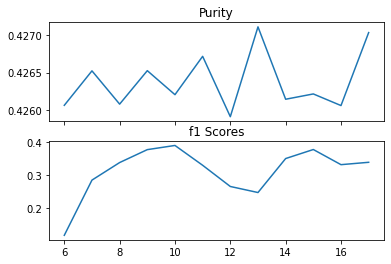

In [5]:
from sklearn.decomposition import PCA
pcadata = PCA(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(pcadata,"PCA")



In [6]:
#kmeansdata = scaleddf.drop(['generalelectionVote','envirogrowth','immigcultural','immigself','immigecon','euintegrationself','happyeuleave'])


In [7]:
"""
purity_values = [] 
cluster_numbers = []
for i in range(6,18):
    print(i)
    cluster_numbers.append(i)
    kmeans = KMeans( n_clusters = i+1)
    kmeans.fit_predict(kmeansmatrix)
    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
    purity_values.append(mean_purity)"""

'\npurity_values = [] \ncluster_numbers = []\nfor i in range(6,18):\n    print(i)\n    cluster_numbers.append(i)\n    kmeans = KMeans( n_clusters = i+1)\n    kmeans.fit_predict(kmeansmatrix)\n    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)\n    purity_values.append(mean_purity)'

0.4263215525637288
0.4263286186396801
0.4262164363217643
0.4265002939823691
0.4263341196065345
0.42665273698833506
0.42607633223619246
0.42726858460925815
0.42637132107126857
0.42609636513383997
0.4263370749545635
0.4264829241213561
No Dim Reduction
[0.3472480034534859, 0.2920353982300885, 0.3604575868767537, 0.3275199654651414, 0.3681847614936326, 0.33123246276710555, 0.2679905029138787, 0.3965033455644291, 0.36727822145478095, 0.36283185840707965, 0.37699115044247783, 0.2699330887114181]
(12,)


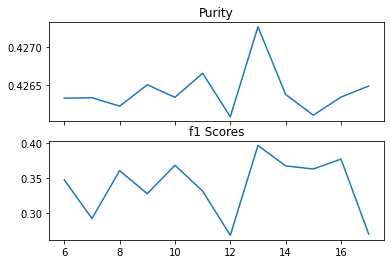

In [8]:
kmpurity(kmeansmatrix,"No Dim Reduction")

0.4261732232620175
0.4256360792778463
0.424986427998216
0.4247900757302816
0.42583503881708157
0.4260985961462579
0.42571274382488217
0.4253875178527562
0.4256276662253578
0.42637088539352175
0.426141263849834
0.42544399337904715
TSNE
[0.30666954457155193, 0.3096050075545003, 0.3471184977336499, 0.2629397798402763, 0.3703431901575652, 0.30092812432549104, 0.29307144398877616, 0.38717893373624, 0.3094755018346644, 0.3314051370602202, 0.37979710770559033, 0.2328081156917764]
(12,)


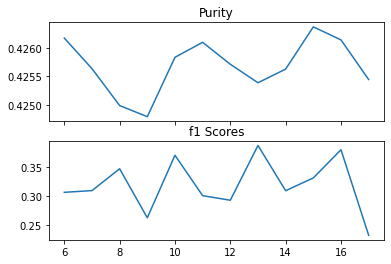

In [9]:
from sklearn.manifold import TSNE
tsnedata = TSNE(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(tsnedata,"TSNE")

0.6649673654302224
0.6654753376576779
0.7148404606372758
0.7166343029974042
0.7285343636710693
0.7239251759332634
0.7232202808075355
0.7032136820058015
0.6950562812033528
0.7162921525642647
0.703477929043355
0.7237353503650011
LDA to 5D
[0.799007122814591, 0.7893373624001727, 0.8082883660695014, 0.8012950571983596, 0.8123462119576949, 0.7822577163824735, 0.7132311677099071, 0.6979926613425427, 0.6843945607597669, 0.7993956399740989, 0.7812216706237859, 0.798014245629182]
(12,)


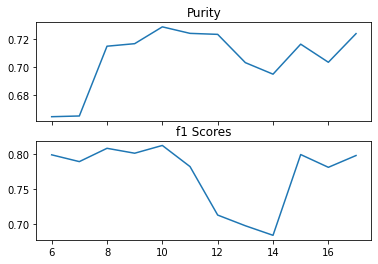

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
lda5ddata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(lda5ddata,"LDA to 5D")




0.7251338295126507
0.7329030114398273
0.7312853128012174
0.7159945946091313
0.7237083178282779
0.7206252694708097
0.7322225857061153
0.7464701810742084
0.7470478858072702
0.7299359584301401
0.7383028307014731
0.7367344825022359
NCA
[0.7735808331534644, 0.7877401251888625, 0.6599179797107706, 0.7708612130369091, 0.716123462119577, 0.6971292898769695, 0.7156054392402331, 0.7171595078782647, 0.6203323980142457, 0.7803582991582129, 0.6454133390891431, 0.7434060004316858]
(12,)


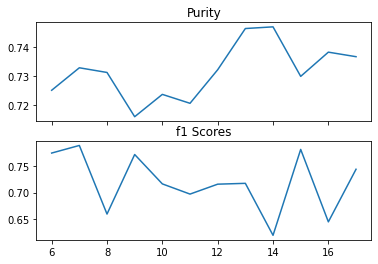

In [11]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
ncadata =nca.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ncadata,"NCA")


In [12]:
"""u_labels = np.unique(scaleddf[idmode])
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)
    plt.legend(markerscale =6)
    
plt.show()"""

'u_labels = np.unique(scaleddf[idmode])\nfig = plt.figure(figsize=(20,20))\nax = fig.add_subplot()\nfor i in u_labels:\n    if i == "No - none" or i == "Don\'t know"or i ==\'Scottish National Party (SNP)\' or i == "Plaid Cymru":\n        continue\n    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)\n    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)\n    plt.legend(markerscale =6)\n    \nplt.show()'

C:\Users\kiera\anaconda3\envs\intro_to_ai\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.4711730734014326
0.4533613812112531
0.4482997619767559
0.4563001824596056
0.45281458752579945
0.4968475701804211
0.49580543016055945
0.5069424634541003
0.5026631070348961
0.5133957276277947
0.5256602213156004
0.5829743259440945
QDA
[0.11823872221023095, 0.11741851931793654, 0.42641916684653575, 0.4270235268724369, 0.4266781782862076, 0.4244765810489963, 0.42706669544571557, 0.42723936973883014, 0.13205266565939996, 0.12885819123677963, 0.12967839412907403, 0.1297215627023527]
(12,)


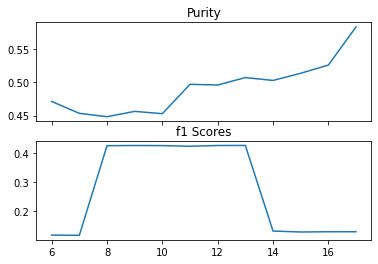

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(kmeansdata,scaleddf[idmode])
qdadata = clf.decision_function(kmeansdata)
kmpurity(qdadata,"QDA")

0.7046963296063349
0.6806468109986769
0.6842248128373898
0.6921657482734833
0.6733936743075244
0.7179408220965572
0.7572522000482073
0.759738729616535
0.7474853693624955
0.7776298730120911
0.7745785321528098
0.7546951565152192
LDA Then QDA
[0.7472480034534859, 0.5656809842434708, 0.31279948197712065, 0.3030865529894237, 0.6916900496438593, 0.7060651845456508, 0.4161450464062163, 0.6099719404273689, 0.7193611051154759, 0.5017051586445068, 0.5262680768400604, 0.7283833369307146]
(12,)


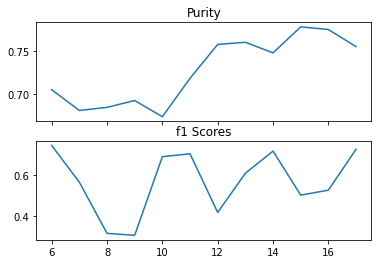

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
clf = QuadraticDiscriminantAnalysis().fit(ldadata,scaleddf[idmode])
ldaqdadata = clf.decision_function(ldadata)
kmpurity(ldaqdadata,"LDA Then QDA")

0.7260426120697847
0.7338682921672705
0.7326097431290071
0.7137339710393155
0.7242085656998956
0.7346118176230271
0.7332466044313319
0.7409224904776079
0.7463029684518009
0.7382999842449239
0.7361538067289951
0.7390842417416986
LDA
[0.7731059788473991, 0.7880423052018131, 0.78717893373624, 0.6241312324627671, 0.7203971508741636, 0.6596589682710986, 0.7679689186272394, 0.6873300237427153, 0.6631987912799482, 0.6692423915389596, 0.7010144614720484, 0.7799266134254262]
(12,)


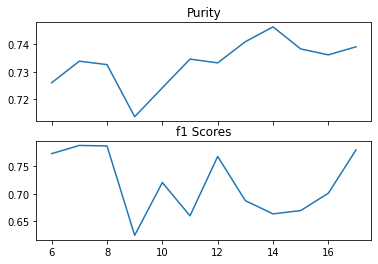

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(ldadata,"LDA")

